In [1]:
#Import the required modules, numpy for calculation, and Matplotlib for drawing
import numpy as np  #to handle arrays
import matplotlib.pyplot as plt    #ploting
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
#This code is for jupyter Notebook only
%matplotlib inline

array([10, 14, 34, 44, 36, 22, 67, 79, 90])

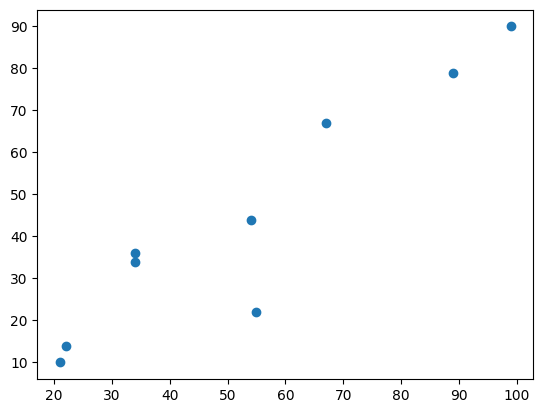

In [2]:
# define data, and change list to array
x = [21,22,34,54,34,55,67,89,99]
x = np.array(x)
y = [10,14,34,44,36,22,67,79,90]
y = np.array(y)
#Show the effect of a scatter plot
plt.scatter(x,y)
y

*Use readymade liberaries sklearn*

In [3]:
#The basic linear regression model is wx+ b, and since this is a two-dimensional space, the model is ax+ b
def model(a, b, x):
    return a*x + b



#The most commonly used loss function of linear regression model is the loss function of mean variance difference
def loss_function(a, b, x, y):
    num = len(x)
    prediction=model(a,b,x)
    return (0.5/num) * (np.square(prediction-y)).sum()


#The optimization function mainly USES partial derivatives to update two parameters a and b
def optimize(a,b,x,y):
    num = len(x)
    prediction = model(a,b,x)
    #Update the values of A and B by finding the partial derivatives of the loss function on a and b
    da = (1.0/num) * ((prediction -y)*x).sum()
    db = (1.0/num) * ((prediction -y).sum())
    a = a - Lr*da
    b = b - Lr*db
    return a, b

In [4]:
#iterated function, return a and b
error=[]
def iterate(a,b,x,y,times):
    for i in range(times):
        a,b = optimize(a,b,x,y)
        loss = loss_function(a, b, x, y)
        error.append(loss)
    return a,b,error



1
[0.17219583]
0.9566212762452231 [0.17141059] 69.45050257650612


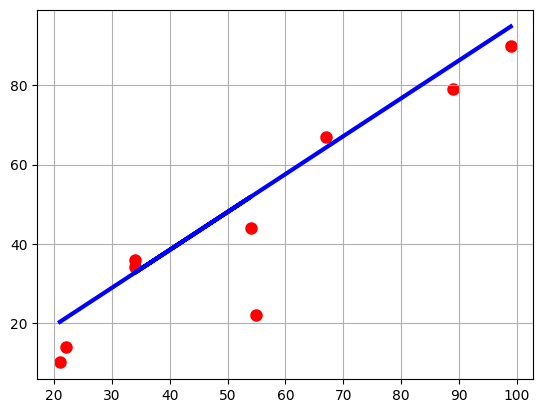

In [5]:
#Initialize parameters and display
a = np.random.rand(1)
a=1
print(a)
b = np.random.rand(1)
print(b)
Lr = 1e-5

#For the first iteration, the parameter values, losses, and visualization after the iteration are displayed
a,b, error= iterate(a,b,x,y,10)
prediction=model(a,b,x)
loss = loss_function(a, b, x, y)
print(a,b,loss)
plt.scatter(x,y, color="red",linewidth=3)
plt.plot(x,prediction,color="blue",linewidth=3)
plt.grid()

### Read data from Excel sheet and apply Linear regession from sklearn

In [6]:
# define data, and change list to array
data=pd.read_csv('IQ.csv')
x = data['Birthweight(X)'].values
#x = np.array(x)
y = data['IQ (Y)'].values
#y = np.array(y)
x=x.reshape(-1,1)
y=y.reshape(-1,1)
#Show the effect of a scatter plot
plt.scatter(x,y)
plt.grid()



FileNotFoundError: [Errno 2] No such file or directory: 'IQ.csv'

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the training sets
result=model.fit(x,y)

In [ ]:
# Make predictions using the testing set
y_pred = model.predict(x)


Coefficients  w: 
 [[0.05202094]]
Bais  b: 
 [29.21713158]
Mean squared error: 62.46


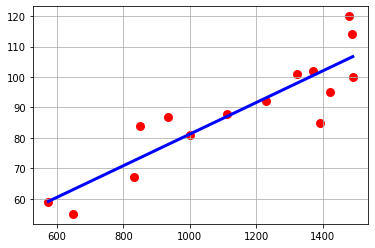

In [ ]:

# The coefficients
print("Coefficients  w: \n", result.coef_)
print("Bais  b: \n", result.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# Plot outputs
plt.scatter(x, y, color="red", linewidth=3)
plt.plot(x, y_pred, color="blue", linewidth=3)
plt.grid()
plt.show()


### Linear regression using keras lib

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


,Birthweight(X),IQ (Y)
0,575,59
1,650,55
2,832,67
3,850,84
4,933,87
5,1001,81
6,1111,88
7,1230,92
8,1321,101
9,1370,102


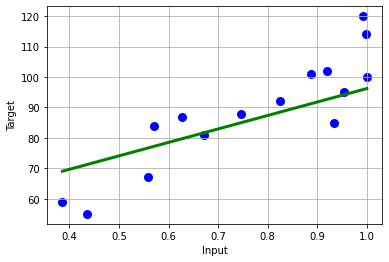

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

df=pd.read_csv('IQ.csv')
X = df.iloc[:,0].values
y = df.iloc[:,1].values

X=np.array(X)/np.max(X)
y=np.array(y)

model = Sequential()
model.add(Dense(1, input_dim=1))
model.add(Activation('linear'))

sgd = SGD(0.01)
model.compile(loss='mse',optimizer=sgd)

history = model.fit(X,y,epochs=100,verbose=0)

model.summary()
pred = model.predict(X)
plt.scatter(X, y, c='blue' , linewidth=3)
plt.plot(X, pred, color='g', linewidth=3)
plt.ylabel("Target")
plt.xlabel("Input")
plt.grid()


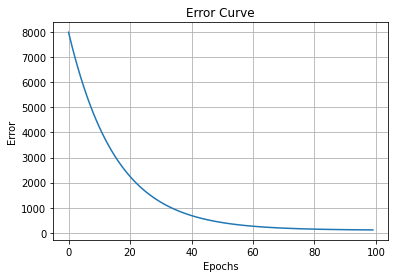

In [ ]:
plt.plot(history.history["loss"])
plt.title("Error Curve")
plt.ylabel("Error")
plt.xlabel("Epochs")
plt.grid()